

---
<div style="text-align: center; background-color: #9fa8da; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 38px; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">
   AI VS HUMAN: ACADEMIC ESSAY AUTHENTICITY CHALLENGE
    </h1>
</div>

---




---
<div style="text-align: center; background-color: #fff8e1; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 38px; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">
   Import Libraries
    </h1>
</div>

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import re
import nltk
import joblib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
# read the data
df = pd.read_csv('train_essays.csv')

In [52]:
# display the top 5 rows
df.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [53]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [54]:
# check the count
df['generated'].value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [55]:
generated_counts = df['generated'].value_counts()

# Labels for the pie chart (mapping 1 -> 'Generated', 0 -> 'Not Generated')
labels = ['Generated', 'Not Generated']

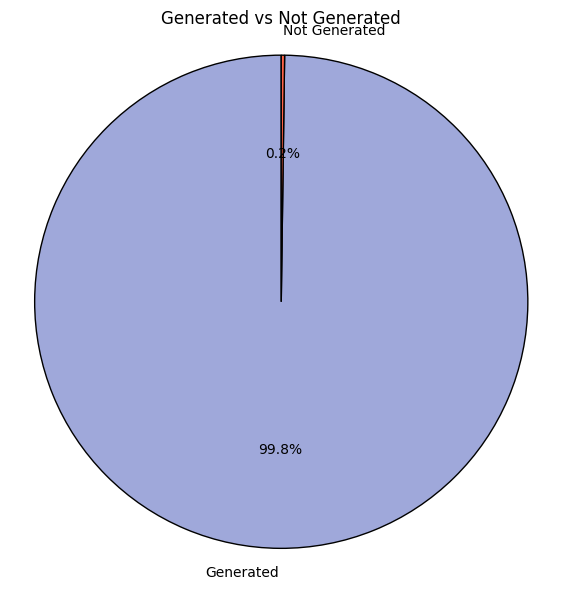

In [56]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(generated_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#9fa8da', '#FF6347'], wedgeprops={'edgecolor': 'black'})
plt.title('Generated vs Not Generated')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

### Imbalance Data Here, we need to balance it

In [57]:
# read a new data
new_df = pd.read_csv('LLM_generated_essay_PaLM.csv')

# read the data
new_df.head()

,id,prompt_id,text,generated
0,0,0.0,## The Advantages of Limiting Car Usage\n\nIn ...,1.0
1,1,0.0,"The United States is a car-dependent nation, w...",1.0
2,2,0.0,"In recent years, there has been a growing move...",1.0
3,3,0.0,"In recent years, there has been a growing move...",1.0
4,4,0.0,"In the past few decades, the United States has...",1.0


In [58]:
# info about the data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1384 non-null   int64  
 1   prompt_id  1384 non-null   float64
 2   text       1384 non-null   object 
 3   generated  1384 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 43.4+ KB


In [59]:
# check the count
new_df['generated'].value_counts()

generated
1.0    1384
Name: count, dtype: int64

In [61]:
# both dataframes have the same number of rows
df = df.reset_index(drop=True)
newdf = new_df.reset_index(drop=True)


# Assuming you want the columns 'id', 'prompt_id', 'text', and 'generated'
data = pd.concat([df[['id', 'prompt_id', 'text', 'generated']], new_df[['id', 'prompt_id', 'text', 'generated']]], axis=0, ignore_index=True)

In [62]:
# new df info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2762 non-null   object 
 1   prompt_id  2762 non-null   float64
 2   text       2762 non-null   object 
 3   generated  2762 non-null   float64
dtypes: float64(2), object(2)
memory usage: 86.4+ KB


In [64]:
data.to_csv('newdf.csv', index=False)

In [63]:
# check the counts for generated 
data['generated'].value_counts()

generated
1.0    1387
0.0    1375
Name: count, dtype: int64

### Dataset is Balanced now,
#### *1.0 indicates AI text*
#### *0.0 indicates Human text*

In [2]:
# read a new data
data = pd.read_csv('newdf.csv')

In [3]:
generated_counts = data['generated'].value_counts()

# Labels for the pie chart (mapping 1 -> 'Generated', 0 -> 'Not Generated')
labels = ['Generated', 'Not Generated']

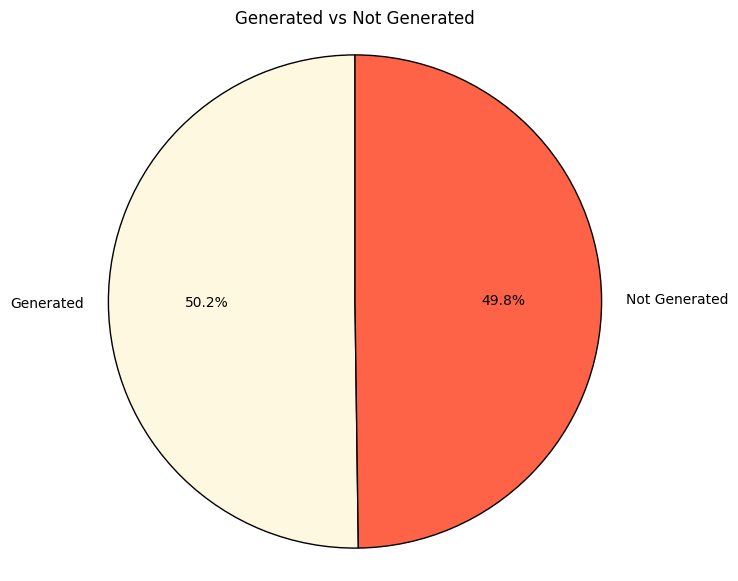

In [4]:
# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(generated_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#fff8e1', '#FF6347'], wedgeprops={'edgecolor': 'black'})
plt.title('Generated vs Not Generated')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()



---
<div style="text-align: center; background-color: #fff8e1; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 38px; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">
   Data Preprocessing
    </h1>
</div>

---


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2762 non-null   object 
 1   prompt_id  2762 non-null   float64
 2   text       2762 non-null   object 
 3   generated  2762 non-null   float64
dtypes: float64(2), object(2)
memory usage: 86.4+ KB


In [6]:
# Drop the 'id' and 'prompt_id' columns from the DataFrame
data = data.drop(columns=['id', 'prompt_id'])

In [7]:
# Rename the 'generated' column to 'label'
data = data.rename(columns={'generated': 'label'})

In [8]:
# Display the updated DataFrame
data.head()

,text,label
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [9]:
# Ensure you have these nltk resources
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0860\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0860\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Define text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(filtered_tokens)

In [11]:
# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

In [13]:
# Prepare the features (X) and target (y)
X = data['cleaned_text']
y = data['label']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize the TfidfVectorizer and RandomForestClassifier inside a pipeline
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),  # Limit the number of features to avoid overfitting
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

In [79]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[280   0]
 [  0 273]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       280
         1.0       1.00      1.00      1.00       273

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.00       553



In [80]:
# Save the model using joblib
joblib.dump(pipeline, 'random_forest_text_classifier.joblib')

['random_forest_text_classifier.joblib']

### Text Cleaning:

Lowercasing.
Removing special characters.
Removing stopwords (commonly used words that don’t add much meaning).
Tokenization (splitting the text into words).
Vectorization: We'll convert the text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), which is commonly used for text classification tasks.

Random Forest Classifier: We'll train a Random Forest model to predict whether the text is generated or not generated.

Evaluate the Model: Print the Confusion Matrix and Classification Report.

Save the Model: Save the trained Random Forest model to a .joblib file.

In [89]:
# Prediction Logic
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('random_forest_text_classifier.joblib')


# Example function to predict whether a given text is "human generated" or "AI generated"
def predict_text(index):
    # Get the text from the given index
    text = data.loc[index, 'text']
    
    # Clean the text using the same cleaning function that was used during training
    cleaned_text = clean_text(text)  # You should have the 'clean_text' function defined

    # Get the prediction from the model
    prediction = model.predict([cleaned_text])

    # Decode the prediction (0: Not Generated, 1: Generated)
    label = "AI Generated" if prediction[0] == 1 else "Human Generated"
    
    # Return the result
    return label

# Example: Predict for the text at index 0
index_value = 2737  # Replace with any index you want to test
result = predict_text(index_value)

# Print the prediction result
print(f"The text at index {index_value} is: {result}")


The text at index 2737 is: AI Generated


In [90]:
# Prediction Logic
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('random_forest_text_classifier.joblib')


# Example function to predict whether a given text is "human generated" or "AI generated"
def predict_text(index):
    # Get the text from the given index
    text = data.loc[index, 'text']
    
    # Clean the text using the same cleaning function that was used during training
    cleaned_text = clean_text(text)  # You should have the 'clean_text' function defined

    # Get the prediction from the model
    prediction = model.predict([cleaned_text])

    # Decode the prediction (0: Not Generated, 1: Generated)
    label = "AI Generated" if prediction[0] == 1 else "Human Generated"
    
    # Return the result
    return label

# Example: Predict for the text at index 0
index_value = 20  # Replace with any index you want to test
result = predict_text(index_value)

# Print the prediction result
print(f"The text at index {index_value} is: {result}")


The text at index 20 is: Human Generated




---
<div style="text-align: center; background-color: #fff8e1; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 38px; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">
   Convolutional Neural Networks 
    </h1>
</div>

---


In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define text cleaning function (same as before)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

In [97]:
# Prepare the features (X) and target (y)
X = data['cleaned_text']
y = data['label']

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Limit to 5000 most common words
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
X_pad = pad_sequences(X_seq, maxlen=100)  # Set maxlen to 100 for padding

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()

# Embedding layer to convert words to word embeddings
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))

# Add 1D Convolutional layers
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [100]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5


35/35 [==============================] - 2s 31ms/step - loss: 0.5838 - accuracy: 0.8031 - val_loss: 0.3778 - val_accuracy: 0.9765
Epoch 2/5
35/35 [==============================] - 1s 23ms/step - loss: 0.1711 - accuracy: 0.9919 - val_loss: 0.0391 - val_accuracy: 0.9964
Epoch 3/5
35/35 [==============================] - 1s 23ms/step - loss: 0.0213 - accuracy: 0.9986 - val_loss: 0.0145 - val_accuracy: 0.9964
Epoch 4/5
35/35 [==============================] - 1s 23ms/step - loss: 0.0079 - accuracy: 0.9991 - val_loss: 0.0087 - val_accuracy: 0.9964
Epoch 5/5
35/35 [==============================] - 1s 26ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9964


In [101]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model
model.save('cnn_text_classifier.h5')

18/18 [==============================] - 0s 3ms/step
Confusion Matrix:
[[278   2]
 [  0 273]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       280
           1       0.99      1.00      1.00       273

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.00       553



C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
